**Chapter 1 – The Machine Learning landscape**


Adapted From *Hands-on Machine Learning*, Aurélien Gueron (O'Reilly).

_This is the code used to generate some of the figures in chapter 1._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:

# Common imports
import numpy as np
import numpy.random as rnd
import os
import requests
import codecs
import io

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def url_to_content (url,encoding='utf-8',bufferize=False):
    r = requests.get(url)
    content_raw = r.content
    # Content downloaded by request is a byte string.  We're pretty sure this one has this encoding
    content = codecs.decode(content_raw,encoding=encoding)
    if bufferize:
        return io.StringIO(content)
    else:
        return content

# Load and prepare Life satisfaction data

Jupyter notebook users:  Before starting this exercise you may want to create a folder called `datasets` in the folder where this notebook is stored.  We will be placing various data files in that folder, and the code below is written so as to look there.  We will be making various subfolders in the `datasets` folder, and if you want, you can start by 
creating the first one right away. It's called `lifesat`.

So let's say your data is stored in a Unix type system in the folder `/Users/fred/Desktop/school/python_for_ss`.  Then there is a subfolder of that called
`datasets` and a subfolder of **that** called `lifesat`.  So the full path to the `lifesat` data looks
like this.

```
/Users/fred/Desktop/school/python_for_ss/datasets/lifesat
```

Google colab users:  After creating a directory called datasets on your Google Drive, mount your google drive.  The path to your data will look like this



In [47]:
#Sample google drive code.  
from google.colab import drive
import os.path
# Mount google drive to create a filesystem the notebook can use
drive.mount('/content/gdrive') 
# Specify the data dir in the new filesystem.
data_dir ='/content/gdrive/My Drive/data'
file_path = os.path.join(data_dir, 'oecd_bli_2015_2.csv')
# Save df to the datasets dir on you rggogle drive.
oecd_bli.to_csv(file_path,index=False,header=False)
#df.to_csv('births_example.csv',index=False,header=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
.csv')
# Save df to the datasets dir on you rggogle drive.
oecd_bli.to_csv(file_path,index=False,header=False)
#df.to_csv('births_example.csv',index=False,header=False)

The OECD (Organization for Economic Cooperation and Development) stats website  contains all kinds if economic statistics on countries in downloadable form, in particular in a very popular stripped-down spreadsheet format call ".csv" (for comma-separated values).  You will get a local copy.  The particular dataset we want is  the BLI data ("Better Life Index").  

It contains a number of economic and social variables used to estimate
"Quality of Life" in communities large and small.  Try this now so you can have a local copy of this data
Visit [here](http://stats.oecd.org/index.aspx?DataSetCode=BLI) and choose the year 2015 so you get numbers like the ones below.  Then pull down the export menu, and choose 
CSV format.  Download the file into a subfolder of the `datasets` folder called `lifesat`.

In [11]:
import pandas as pd

notebook_lifesat_url0 = 'https://github.com/gawron/python-for-social-science/blob/master/pandas/datasets/lifesat/'
lifesat_url = notebook_lifesat_url0.replace('github', 'raw.githubusercontent')
lifesat_url = lifesat_url.replace('blob/','')

def load_lifesat_data ():
    oecd_file = 'oecd_bli_2015.csv'
    oecd_url= f'{lifesat_url}{oecd_file}'
    #oecd_bli_url0 = 'https://github.com/gawron/python-for-social-science/blob/master/pandas/datasets/lifesat/oecd_bli_2015.csv'
    return pd.read_csv(oecd_url, thousands=',',encoding='utf-8')
    #return pd.read_csv(oecd_bli_url0, thousands=',',encoding='utf-8')

oecd_bli = load_lifesat_data()
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

This table contains economic and social statistics for people in a number of countries.  The `INEQUALITY` attribute
is for looking at subpopulations like low/high income, men/women.  Since we won't be looking at those
sub-populations in this exercise, the first step after reading in the data is to reduce the table to those 
rows containing statistics about the total population.

The data in this big table is stored in an interesting and very popular format. Let's understand that 
before moving on.  First there are facts about 36 distinct countries.  One of the names in the `Country`
column  (`OECD - Total`) is a label under which totals for all the countries will be aggregated.

In [12]:
countries = set(oecd_bli['Country'])
print(len(countries), 'countries in data')
print (countries)

37 countries in data
{'United States', 'Norway', 'Canada', 'Korea', 'Brazil', 'OECD - Total', 'Chile', 'Turkey', 'Russia', 'Iceland', 'Netherlands', 'Poland', 'Belgium', 'United Kingdom', 'Estonia', 'Finland', 'Slovenia', 'Czech Republic', 'Australia', 'Austria', 'Sweden', 'France', 'Mexico', 'Japan', 'Luxembourg', 'Israel', 'Germany', 'Spain', 'Denmark', 'Italy', 'Slovak Republic', 'Portugal', 'New Zealand', 'Greece', 'Switzerland', 'Ireland', 'Hungary'}


The cell below shows what happens when we zoom in on one country, Poland.  The table contains a number of rows with information about Poland, each with a different value in the `INDICATOR` column (code name) or `Indicator` column (English name).  That is the name of some statistic about Poland.  The numerical value for that statistic is in the `Value` column and the unit for that statistic and the unit is in the `UNIT CODE` (or `Unit`) column.  So the first row printed out tells us that 3.2% of all households in Poland are dwellings without basic facilities, an indicator of substantial poverty.

In [13]:
pol = oecd_bli[oecd_bli["Country"]=="Poland"]
pol

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
21,POL,Poland,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,3.20,NaN,NaN
130,POL,Poland,HO_HISH,Housing expenditure,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,21.00,E,Estimated value
239,POL,Poland,HO_NUMR,Rooms per person,L,Value,TOT,Total,RATIO,Ratio,0,units,NaN,NaN,1.10,NaN,NaN
348,POL,Poland,IW_HADI,Household net adjusted disposable income,L,Value,TOT,Total,USD,US Dollar,0,units,NaN,NaN,17852.00,E,Estimated value
531,POL,Poland,IW_HNFW,Household net financial wealth,L,Value,TOT,Total,USD,US Dollar,0,units,NaN,NaN,10919.00,NaN,NaN
640,POL,Poland,JE_EMPL,Employment rate,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,60.00,NaN,NaN
825,POL,Poland,JE_JT,Job security,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,7.30,NaN,NaN
936,POL,Poland,JE_LTUR,Long-term unemployment rate,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,3.77,NaN,NaN
1121,POL,Poland,JE_PEARN,Personal earnings,L,Value,TOT,Total,USD,US Dollar,0,units,NaN,NaN,22655.00,NaN,NaN
1306,POL,Poland,SC_SNTWS,Quality of support network,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,91.00,NaN,NaN


We can use the `pivot` method to recast the data into a much easier to grasp format.  The key point is that each country and INDICATOR determines a specific value.  So let's have one row for each country with one column for each `INDICATOR`, and in that column we'll place the `VALUE` associated with that country and that indicator.  It's as easy as this:

In [14]:

oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In the exercise ahead, we're going to take particular interest in the `Life satisfaction` score,  a kind of general "quality of life" or "happiness" score computed from a formula combining many of the indicators in this data. 

In [15]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

Notice when we print out the `Life satisfaction` column, the country name is also printed out.  This is because the `Country` was defined as the index of the new table created when we used the `pivot` method.  Think of the index column (or columns) as providing a unique name for each row.

# Load and prepare GDP per capita data

Elsewhere, on the world wide web, with help from Google, we find data about GDP  ("gross domestic product")
[here](http://goo.gl/j1MSKe).  Hit the download butten and place another csv file in the same
directory as the last data.

In [16]:
# Downloaded data from http://goo.gl/j1MSKe (=> imf.org) to github
def load_gdp_data ():
    gdp_file = "gdp_per_capita.csv"
    gdp_url = f'{lifesat_url}{gdp_file}'
    return pd.read_csv(gdp_url, thousands=',', delimiter='\t',
                                 encoding='latin1', na_values="n/a")
    
gdp_per_capita = load_gdp_data()
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
# Make "Country" the index column.  We are going to merge data on this column.
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


 We now engage in the great magic, the single most important operation by which information is created, the `merge`.
 We are going to take the quality of life data, which is indexed by country, and the GDP data, which is  now also indexed
 by country, and  merge rows, producing one large table which contains all the rows and columns of the `oecd_bli` table,
 as well as a new `GDP per Capita` column.

In [17]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [18]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

Notice that when we do this merge, we lose some rows, in particular, countries for which we have GDP information, but no happiness stats.  Consider Cypress.

In [19]:
cyprus_gdp_per_capita  = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
cyprus_gdp_per_capita 

22587.49

But when we try to look up Cypress in the merged data, we get an error.  So as things stand now, we can't find out the quality of life score for Cypress.  We return to this problem below.

In [20]:
full_country_stats.loc['Cyprus']

KeyError: ignored

# Make a linear regression model

We are going to try to build a model that predicts life satisfaction from GDP.  The kind of model
we're going to use is called a **LInear Regression model**.

To start with, we are going to separate our country data into two sets, one set of countries which we use to train our model, and the other set which will be held back during training.  We call this second part of the data the **test set**.  We are going to ask our model to try to **predict** the life satisfaction of the test countries.  Let's choose 7 countries for the test, and since we have our countries sorted by GDP, let's pick 3 countries from the low end and 3 countries from the high end to test on.

In [21]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [22]:
sample_data.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


It's pretty easy to show that a model like this has some potential for making accurate predictions.

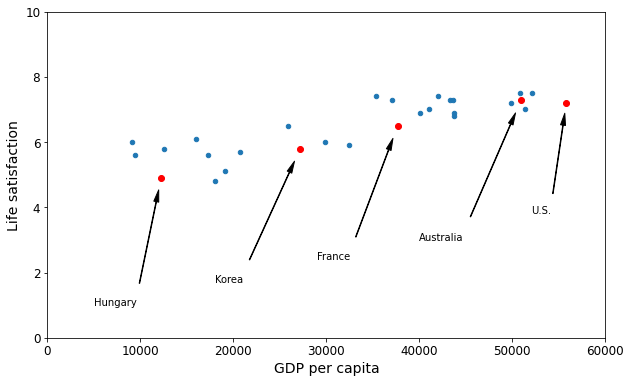

In [25]:
# Scatter all the points, using the pandas DF plot method.
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(10,6))
# GDP 0-60K X-axis. LifeSat 0-10 Y-axis
plt.axis([0, 60000, 0, 10])
# Text positions need some eyeballing, and so are entered by hand. x = left edge of text
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.show()

As the GDP grows the Life satisfaction grows.  Over on the right, the life satisfaction of the US isn't quite where we'd expect it to be.  Although the US has higher GDP than Australia, its life satisfaction trails behind.  But all in all, it's a pretty strong trend.  More money equals more happiness.

In [ ]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


## Doing it by hand

Let's try to draw some lines that capture the trends, just using our eyeballs.  Here are some attempts.  $\theta_{0}$ is where the line intercents the y-axis; $\theta_{1}$ is its slope.

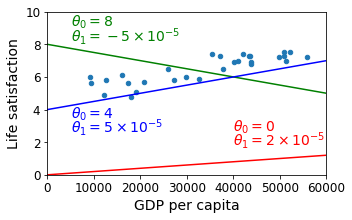

In [ ]:
import numpy as np

# The data
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)

# red line
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")

# green line
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")

# blue line
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")

# save stuff
plt.show()

The blue line isn't bad.  Maybe we can do better if we use some math. 

## The scikit learn linear regression module

We load up the `sklearn` linear regression module and ask it to find the line that best fits our sample data.  What it returns is 
two numbers, the intercept (of the y-axis) and the slope.

In [27]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

Notice creating a `linear_model` produced a python object called `lin1`.  That's what we run the `fit` method on.  This method "fits" the model to the data.
After fitting, the `lin1` object has two numbers called the `intercept` and the `coefficient`.  These are the slope and
intercept of a line.

We draw our data again with the line defined by the slope and intercept. Pretty good fit, eyeballing it.

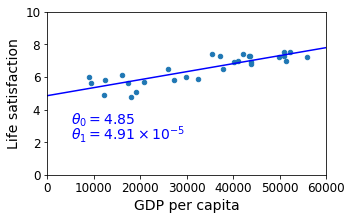

In [28]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()


First, let's try to predict the `Life Satisfaction` for a country we know the GDP of, which is missing from our
quality of life data, `Cypress`.

What we do is plug the GDP for Cypress into the model using the `predict` method, and it returns the predicted
`Life Satisfaction` score, which is 5,96 or so.

In [31]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
cyprus_gdp_per_capita 

22587.49

In [32]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
#print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])
cyprus_predicted_life_satisfaction

array([[5.96244744]])

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


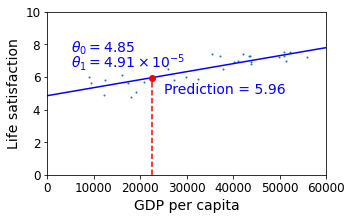

In [33]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
# Plot the line our linear regression model learned.
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
# Plot a vertical red dashed line where the GDP of CYPRESS is. 
# It goes from the x axis right up to where our predicted happiness is.
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
# Plot a fat red dot right where our predicted happiness is
# Notice it lands right on the line, and it has to, because our model just is the line.
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
plt.show()

Look at the sample data that has around the same GDP as Cypress.

In [34]:
sample_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


Suppose we try to predict our life satisfaction by taking the average of these 3 points.

In [35]:
(5.1+5.7+6.5)/3

5.766666666666667

So you can see this estimate is lower than the 5.96 estimated by our model.  This is because the linear model tries for the best line that fits **all** the points, so it responds to the fact that there is a steady upward
trend with a particular slope, and because Spain falls below that line, it is treated as a point whose value has been reduced by **noise**. 

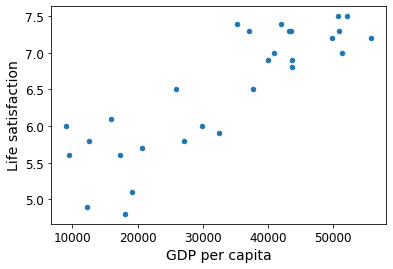

[[5.96242338]]


In [36]:
# Save these to be restpred
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    """
    We already did this above in the notebpook and our work was saved in `sample_data`,
    which is our training set.  Let's use it.
    """
    return sample_data

# Code example
########################################################################
import sklearn
import numpy as np
import pandas as pd

# Load the data
#oecd_bli = pd.read_csv(datapath+"oecd_bli_2015.csv", thousands=',')
#gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',',delimiter='\t',
#                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
lin_reg_model = sklearn.linear_model.LinearRegression()

# Train the model
lin_reg_model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(lin_reg_model.predict(X_new)) # outputs [[ 5.96242338]]
########################################################################

oecd_bli, gdp_per_capita = backup

So far, so good.  But what we really need to do is TEST our model on some data it didn't see during
training, but for which we know the answers.  That was the point of setting aside some test data.

In [37]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [38]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

The cell below compares two models, the one we used before (the dotted blue line), trained on our data sample,
and another model trained on all the data (the solid black line).  The significant difference
between these models suggests **either** that the points we trained on before are not all that representative of the
entire data set **or** that there are things going on that can't be captured by a  linear model.  The first possibility can happen two ways.  Either the training points contain too many outliers, or the test points themselves might be outliers.

See if you can understand the code below.  The red squares are the true locations of our test points.
The dot on the dotted blue line that lies 
directly above or below the red square is its predicted
value according to the model we trained before. If the red square lands directly on the blue line, the model
got it it exactly right.  If the red square is some distance above the line (like "Brazil"),
the model's estimate is low; if the red square is some distance below the blue line (like "Luxembourg"),
the model's estimate is high.  Which of the following statements about the dotted blue
line do the red dots provide evidence for?

  1.  The model underestimates the happiness of poor countries.
  2.  The model overestimates the happiness of poor countries.
  3.  The model underestimates the happiness of rich countries.
  4.  The model overestimates the happiness of rich countries.

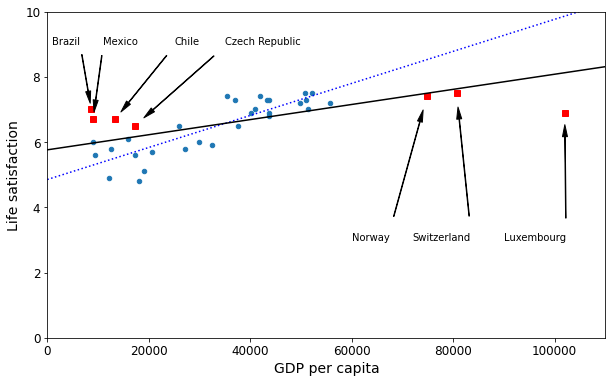

In [42]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(10,6))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
# np.c_ being used here to turn 1D arrays (n,) into 2D (n,1)
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.show()

# Other models

The next cell has some code computing a complicated model, one which does not have to be a line.
It is in essence a higher order polynominal model which curves up and down to capture all the data
points.  We can measure the aggregate error of a model by computing the distance of each actual point from
the curve/line of the model. By that definition,  the polynomial model
is reducing the "error" on the training set by a large amount.   But is it a better model?
Only the performance on a test set will tell us for sure.

Note:  The machine learning toolkit demoed here (`scikit_learn`) has a variety of robust regression
strategies implemented; see [Scikit learn docs](https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html#sphx-glr-auto-examples-linear-model-plot-robust-fit-py) for discussion.


**Pipeline**

We choose a degree, the highest exponent in the polynomial function we will use to make
predictions.  Below we choose 60.

1.  Polynomial features. Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree k. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].  For an input model with one feature (GDP) and k=60, we will compute 60 new feature values [x, x^2, ..., x^60].

2.  Scaler.  The standard scaler maps each feature value x onto z where

    $$z = (x - \mu) / s $$
    
    where $\mu$ is the mean of the feature and $s$ is the standard deviation.  This eliminates the possibility
    of over- or uinder- valuing features with large/small value ranges. 
    
3.  With the new features we still do a linear regression, seeking the hyper plane that provides
    the least squared error solution. Of course we did that by creating
    a model with more features (a higher dimensional space), but then we draw the plot with the original data GDP 
    feature as the X axis and their polynomial combination as the predicted Life Satisfaction value.  
    The result is a sinuous curve.
    
Note:  This is a pretty silly example but we use it to illustrate a simple point.  With a model 
with enough parameters (each of those Polynomial features gets its own coefficient), you can fit
anything.

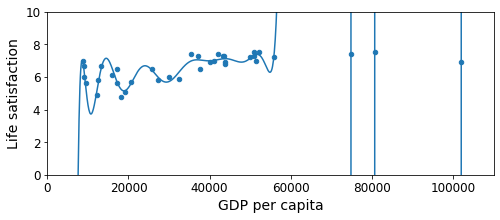

In [44]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import linear_model
#from sklearn.linear_model import RidgeClassifier

poly = preprocessing.PolynomialFeatures(degree=20, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.show()

## Choosing features

Here's an interesting observation about the training data, which a model might "notice" if we had features that represented the letters in the country name.  Let's consider all countries with a "w" in their name:

In [ ]:
full_country_stats.loc[[c for c in full_country_stats.index if "W" in c.upper()]]["Life satisfaction"]

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Life satisfaction, dtype: float64

Every single one of them has life satisfaction score of over 7!  This is fairly high.  If this were represented in our
data, a learner would certainly pick up on it, and treat it as a feature that increases the likelihood
of happiness. Yet it is fairly clear that this is just an accidental feature of our data that will
not generalize to other cases.

This example shows how poorly chosen features can hurt.  They introduce noise that can be mistaken
for meaningful patterns.  We note that this feature does not correlate particularly well with GDP in the GDP
table, which has a larger sample of countries, and we know that very low GDP makes a high life satisfaction score
virtually impossible (because many of the features used to compute the score depend on wealth).  

In [ ]:
# Let's just look at one column of this largish table
gdp_col = gdp_per_capita["GDP per capita"]
gdp_col.loc[[c for c in gdp_col.index if "W" in c.upper()]].head()

Country
Botswana        6040.957
Kuwait         29363.027
Malawi           354.275
New Zealand    37044.891
Norway         74822.106
Name: GDP per capita, dtype: float64

Note that relatively poor Botswana and Malawi are "W"-countries.  This confirms our suspicion that the W "rule" is actually an accident of our sample.

## Ridge learning (regularization)

Model building is all about making reasonable generalizations, which in turn is about wisely choosing which patterns in the data will be used to make those generalizations.

One very important kind of constraint on generalization is called smoothing or regularization.  This is a family of techniques used to used to discourage 
"extreme" models, for example, models that forbid certain kinds of patterns because they were never seen in the training sample.  Without going into the details here, the picture below shows the intended behavior of regularization, using a case in which it works well.  The dashed red line shows a model trained on all the data.  For the time being, think of this as the right answer.  The dotted blue line shows the model trained on our original training sample, which as we noted before, was not entirely representative of the data.  At the GDP extremes, that model drifts quite far from the "right" answer.  The solid blue line is the same kind of model trained on the same sample data, but with "ridge" regularization, which penalizes models with many high coefficients; in this case it will help reduce the slope of the line, while still requiring it to reduce the error on the training data.

The result is the solid blue line, which is closer to the "right" answer than
the original linear regression model.  Note:  *this example is a somewhat oversimplified attempt to convey the intuition of what regularization does.  One wouldn't normally use ridge regression in a case where there's a single predictor variable, because what makes it useful is that it reduce the influence of features that account for less of the variance.*


Saving figure ridge_model_plot


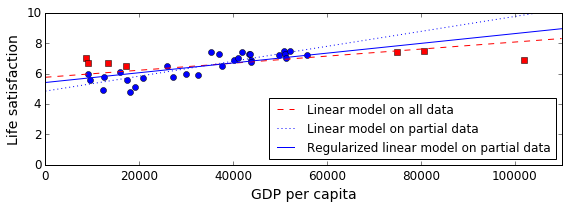

In [ ]:
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.show()

## Example modeling code

The code below is for you to use when training new models.  It trains a new kind of prediction model,
called a `k-
neighbors model`.  It makes use of the work we did before, so if you're fresh here, you'll
have to execute all the cells above.

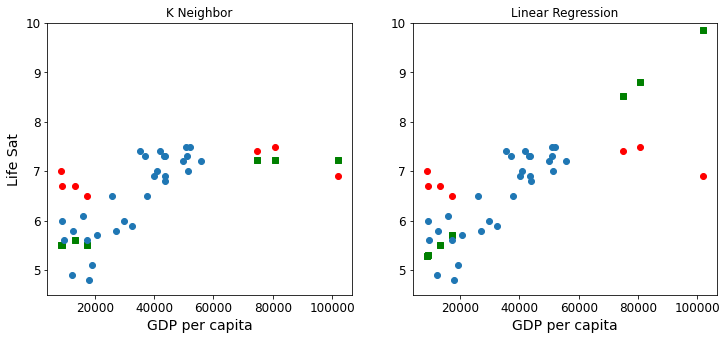

In [ ]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    """
    Just use training data.
    """
    return sample_data

# Code example
########################################################################
from sklearn import neighbors
import numpy as np
import pandas as pd

# Load the data
#oecd_bli = pd.read_csv(datapath+"oecd_bli_2015.csv", thousands=',')
#gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',',delimiter='\t',
#                            encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

#######################################################################
#
#   Training
#
########################################################################

# Select and train a k-neighbors regression model
k_neigh_reg_model = neighbors.KNeighborsRegressor(n_neighbors=3)
k_neigh_reg_model.fit(X, y)
# select and train a linear regression model
lin_reg_model3 = linear_model.LinearRegression()
lin_reg_model3.fit(X, y)

#######################################################################
#
#   Testing
#
########################################################################

#. Get test data
Xm,Ym = missing_data._values[:,0],missing_data._values[:,1]
# Use models to predict y vals on test data.
Yp = k_neigh_reg_model.predict(Xm[:,np.newaxis])
Yp3 = lin_reg_model3.predict(Xm[:,np.newaxis])

#######################################################################
#
#   Plotting
#
########################################################################

# Set up a figure 
f = plt.figure(figsize=(12,5))
#  Add 2 plots side by side
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

#######################################
# Model 1 plot
#######################################
# Put test points in plot
ax.scatter(Xm, Ym, c="r",marker="o")
# Put  predicted test points in plot
ax.scatter(Xm, Yp, c="g",marker="s")
# Put training data in plot
ax.scatter(X,y)
# Labeling plot parameters
ax.set_ylim([4.5,10])
ax.set_title('K Neighbor')
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Life Sat')

#######################################
# Model 2 plot
#######################################
ax2.scatter(Xm, Ym, c="r",marker="o")
ax2.scatter(Xm, Yp3, c="g",marker="s")
ax2.scatter(X,y)
# Labeling plot parameters
ax2.set_ylim([4.5,10])
ax2.set_xlabel('GDP per capita')
ax2.set_title('Linear Regression')

# Make a prediction for Cyprus
#X = [[22587]]  # Cyprus' GDP per capita
#plt.plot(Xm, Yp, "gs")
plt.show()
########################################################################

oecd_bli, gdp_per_capita = backup

In both graphs, the blue points are the training data and the red points are the test data.
The green points are the predicted locations of the red points (using the GDP, the x-value, to predict the Life Satisfaction, the y-value).  Comparing the red points with the blue training data points, we see the test points are distinct outliers.   

In the linear regression graph, as expected, the green points lie on a line chosen based on the blue points, the training data.   The predicted K Neighbor model points do not lie on a line.  K Neighbor is a more powerful, more flexible model and does a better job predicting here, in the sense that there is less spread between the red and green points.  Despite the fact that the training data lacks high GDP countries, the K Neighbor model seems to capture the fact that life satisfaction levels off with GDPs above 60K.

Because the data does not lie on a line, the linear model ends up having two flaws.  It underestimates the life satisfaction of poor folks in the test set, and overestimates that of rich folks. 